# Probability


## Probability Space


A *sample space* $\Omega$ is a collection of all possible outcomes. It is a set of things.

An *event* $A$ is a subset of $\Omega$. It is something of interest on the sample space.

A $\sigma$-*field* is a complete set of events that includes all countably finite unions, interactions, and differences.
It is a well-organized structure built on the sample space. 


A *probability measure* satisfies

* (positiveness) $P\left(A\right)\geq0$ for all events;
* (countable additivity) if $A_{i}$, $i\in\mathbb{N}$, are 
are mutually disjoint, then
$P\left(\bigcup_{i\in\mathbb{N}}A_{i}\right)=\sum_{i\in\mathbb{N}}\mu\left(A_{i}\right).$
* $P(\Omega) = 1$.




**Example**: (probability measure) Personal wealth management: asset allocation.
A probability function is not necessarily about uncertainty. Two allocation rules: 1. Equal weight. 2. Optimal weight.

So far we have answered the question: "What is a well-defined probability?", but we have not yet
answered "How to assign the probability?"

There are two major schools of thinking on probability assignement. One is
*frequentist*, who considers probability as the average chance of occurrence if a large number of experiments
are carried out. The other is *Bayesian*, who deems probability as a subjective brief.
The principles of these two schools are largely incompatible, while each school has
peculiar merit under different context.

## Random Variable

*Random variable* maps events to a real number. If the outcome is multivariate, we call it a *random vector*.


**Data example**

Data source: [HK top 300 Youtubers](https://www.kaggle.com/datasets/patriotboy112/hks-top-300-youtubers). We look at the number of uploaded videos in these accounts.

In [59]:
d0 = readr::read_csv("HKTop300YouTubers.csv")
print(d0)

library(magrittr)

# remove NA and zeros
d0[ d0 == 0 ] <- NA
sel <- d0 %>% is.na( ) %>% apply( 1, any)
d0 %<>% dplyr::filter( !sel )

d1 <- d0 %>% dplyr::select(3:5)
names(d1) <- c("subs", "view", "count")


Rows: 300 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): Youtuber, category
dbl (2): rank, started

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 300 x 7
    rank Youtuber       subscribers `video views` `video count` category started
   <dbl> <chr>                <dbl>         <dbl>         <dbl> <chr>      <dbl>
 1     1 Shadow MusicS~     7690000    3665970114          1144 People ~    2017
 2     2 Emi WongEmi W~     4870000     607656993           390 People ~    2014
 3     3 iQIYI <U+7231><U+5947><U+827A>i~     4010000    1744552001          9740 Film & ~    2015
 4     4 South China M~     2650000    2612265071         11376 News & ~    2007
 5     5 GEM<U+9127><U+7D2B><U+68CB>GEM~      2520000    1752111944            77 People ~    2019
 6     6 Ani-One<U+52D5><U+6F2B><U+5C08>~     2020000     238959467          2026 Film & ~    2016
 7     7 <U+860B><U+679C><U+52D5><U+65B0><U+805E> HK~     1880000    1580438690         70586 News & ~    2007
 8     8 Nikmatul Rosi~     1590000     384841124          1697 People ~    2013
 9     9 Kento BentoKe~     1580000     137410428            38 Educati~    2015
10   

In [60]:
print( d1[["count"]] )

  [1]  1144   390  9740 11376    77  2026 70586  1697    38   346  3370   162
 [13]  1734   138   843  2799   984  3126 30324   510 31372 15326   898  2035
 [25]    91    90  2358   174 13507   355   184    43  5014  4733   698  1088
 [37]  2260  1202   950   255   335    17   156   371   161 34611 10099  8998
 [49]  1204  1222   295   456  1667 10411    91    96    99   804   224   280
 [61]   658   316  3023  3734   161  3190  1490  3725  2408  3311   275   138
 [73]  3376   124   188   466   599  2767   142   635  1516   928   587   246
 [85]   273   570  2803   578  1456   162  4251     4  1080   754    70   200
 [97]  7750  4090   312   206   932   171   349    94   629   203  2671  1729
[109]  5867  2216   297   285   148   988 11673  5119   972   247   532   728
[121]   354   350   353   630   280   602  2596   205   252    24   286   147
[133]  7929   182   610   133   143   390  1916   755    54  1426   823   243
[145]   583    84   380   220   324   216   162   240    29   55

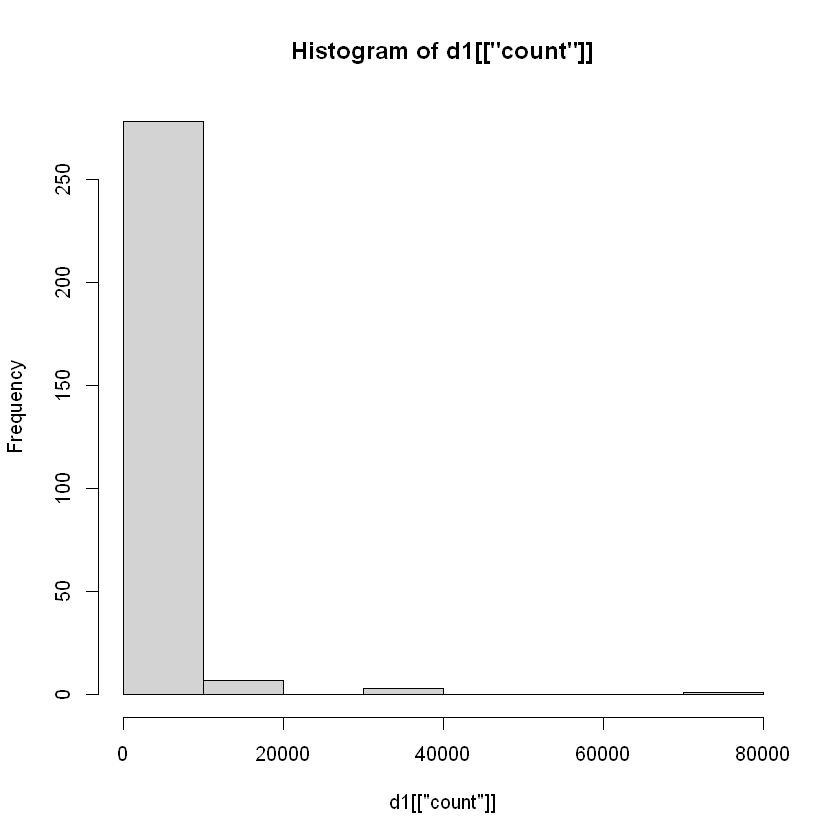

In [61]:
hist(d1[["count"]])

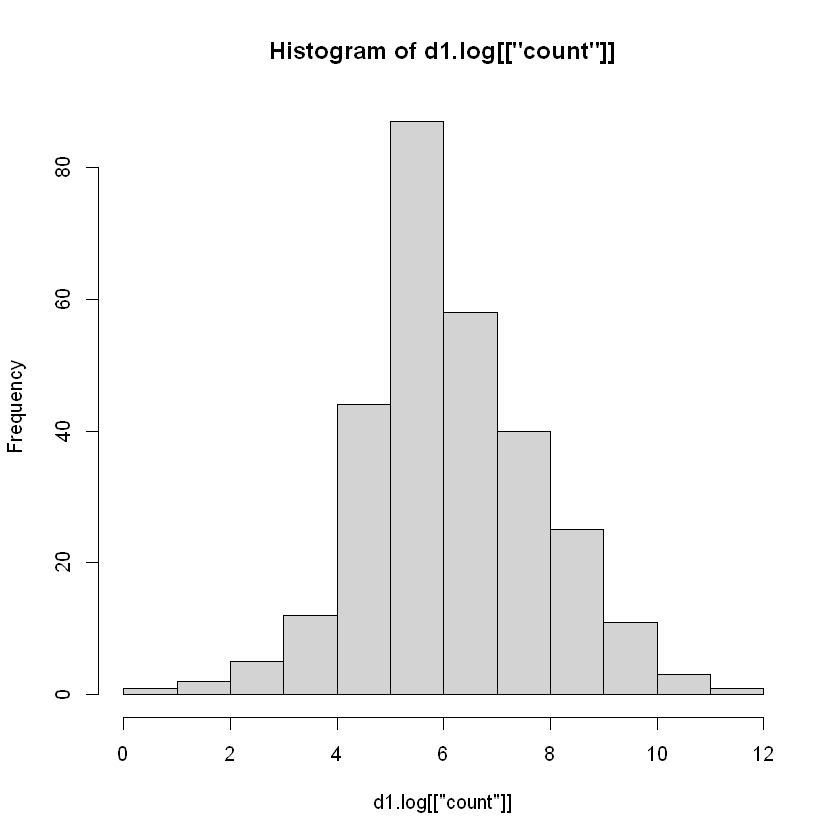

In [62]:
d1.log <- log(d1)
hist(d1.log[["count"]])

## Distribution Function

We go back to some terms that we have learned in a undergraduate
probability course. A *(cumulative) distribution function*
$F:\mathbb{R}\mapsto [0,1]$ is defined as
$$F\left(x\right)=P\left(X\leq x\right)=
P\left(\{X\leq x\}\right).$$
It is often abbreviated as CDF, and it has the following properties.

* $\lim_{x\to-\infty}F\left(x\right)=0$,
* $\lim_{x\to\infty}F\left(x\right)=1$,
* non-decreasing,
* right-continuous $\lim_{y\to x^{+}}F\left(y\right)=F\left(x\right).$

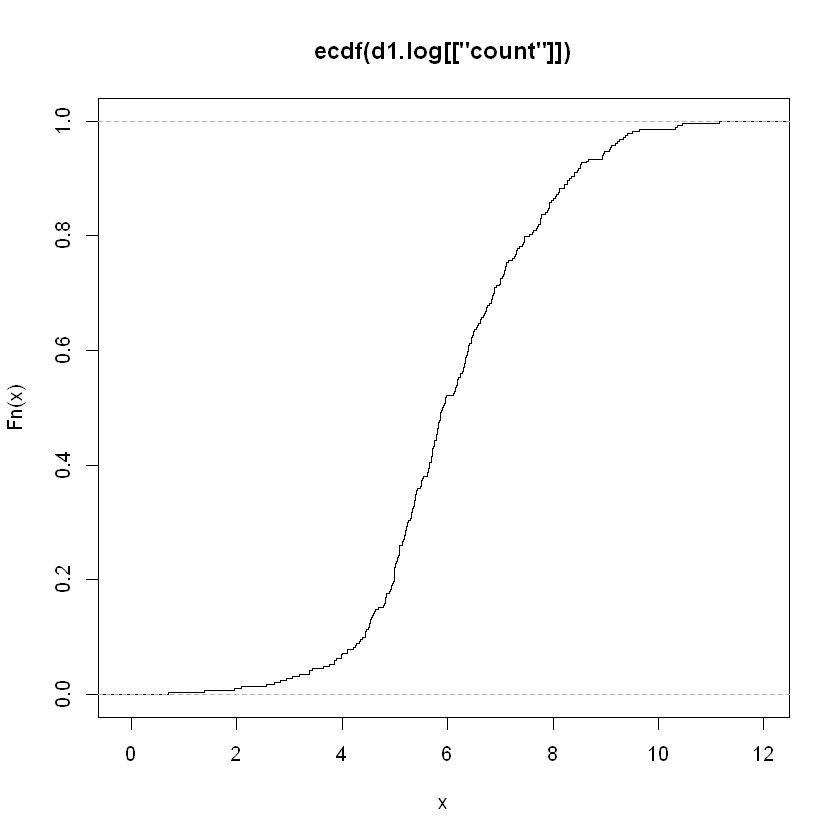

In [63]:
plot(ecdf(d1.log[["count"]]), verticals = TRUE, do.points = FALSE)

Add the definitions of quantiles

In [64]:
quantile(d1.log[["count"]], probs = 1:4/4 )

25%       50%       75%      100% 
 5.087596  5.899897  7.107425 11.164587


For continuous distribution, if there exists a function $f$ such that for all $x$,
$$F\left(x\right)=\int_{-\infty}^{x}f\left(y\right)dy,$$
 then $f$ is
    called the *probability density function* of $X$, often abbreviated as PDF.
It is easy to show that $f\left(x\right)\geq0$ and
    $\int_{a}^{b}f\left(x\right)dx=F\left(b\right)-F\left(a\right)$.



**Example** We have learned many parametric distributions like the binary distribution, the Poisson distribution,
the uniform distribution, the normal distribution, $\chi^{2}$, $t$, $F$ and so on.
They are parametric distributions, meaning that the CDF or PDF can be completely
characterized by a few parameters.



**Example** `R` has a rich collection of distributions implemented in a unified rule:
`d` for density, `p` for probability, `q` for quantile, and `r` for random variable generation.
For instance, `dnorm`, `pnorm`, `qnorm`, and `rnorm` are the corresponding functions of the normal distribution, and the parameters $\mu$ and $\sigma$ can be specified in the arguments of the functions.


In [65]:
qnorm(0.975)

[1] 1.959964

In [66]:
pnorm(0)

[1] 0.5

In [67]:
dnorm(0)

[1] 0.3989423

In [68]:
rnorm(3)

[1] -0.5349621  0.2530505 -2.4317619

In [69]:
rpois(2, 5)

[1] 2 5


Below is a piece of `R` code for demonstration.

1. Plot the density of standard normal distribution over an equally spaced grid system `x_axis = seq(-3, 3, by = 0.01)` (black line).
2. Generate 1000 observations for $N(0,1)$. Plot the kernel density, a nonparametric estimation of the density (red line).
3. Calculate the 95th quantile and the empirical probability of observing a value greater than the 95th quantile.
In population, this value is 5%. What is the number coming out of this experiment?

(Since we do not fix the random seed in the computer, the outcome is slightly different each time we run the code.)

# Expected Value



## Integration

An integral
$\int X\mathrm{d}P$ is called the *expected value,* or
*expectation,* of $X$. We often use the notation
$E\left[X\right]$, instead of $\int X\mathrm{d}P$, for convenience.

Expectation provides the average of a random variable,
despite that we cannot foresee the realization of a random variable in a particular trial
(otherwise the study of uncertainty is trivial). In the frequentist's view,
the expectation is the average outcome if we carry out a large number of independent
trials.

If we know the probability mass function of a discrete random variable, its expectation
is calculated as $E\left[X\right]=\sum_{x}xP\left(X=x\right)$, which is
the integral of a simple function.
If a continuous random variable has a PDF $f(x)$, its expectation
can be computed as  $E\left[X\right]=\int xf\left(x\right)\mathrm{d}x$.




In [70]:
mean( d1.log[["count"]] )

[1] 6.146389


Here are some properties of the expectation.


-  The probability of an event $A$ is the expectation
of an indicator function. $E\left[1\left\{ A\right\}  \right]= 1\times P(A) + 0 \times P(A^c) =P\left(A\right)$.

-   $E\left[X^{r}\right]$ is call the $r$-moment of $X$. The *mean* of a random variable is the first moment $\mu=E\left[X\right]$, and
the second *centered* moment is called the *variance*
$\mathrm{var}\left[X\right]=E\left[\left(X-\mu\right)^{2}\right]$.

In [71]:
var(d1.log[["count"]])

[1] 2.650771


The third centered moment $E\left[\left(X-\mu\right)^{3}\right]$,
called *skewness*, is a measurement of the
symmetry of a random variable, and the fourth centered moment
    $E\left[\left(X-\mu\right)^{4}\right]$, called *kurtosis*, is
     a measurement of the tail thickness.

- We call
    $E\left[\left(X-\mu\right)^{3}\right]/\sigma^{3}$ the *skewness coefficient*, and
    $E\left[\left(X-\mu\right)^{4}\right]/\sigma^{4}-3$ *degree of excess*. A normal distribution's  skewness and  degree of excess are both zero.

    -   **Application**: [The formula that killed Wall
        Street](http://archive.wired.com/techbiz/it/magazine/17-03/wp_quant?currentPage=all)

- Moments do not always exist. For example, the mean of the Cauchy distribution does not exist,
and the variance of the $t(2)$ distribution does not exist.

- $E[\cdot]$ is a linear operation. If $\phi(\cdot)$ is a linear function, then $E[\phi(X)] = \phi(E[X]).$

-   *Jensen's inequality* is an important fact.
A function $\varphi(\cdot)$ is convex if
$\varphi( a x_1 + (1-a) x_2 ) \leq a \varphi(x_1) + (1-a) \varphi(x_2)$ for all $x_1,x_2$
in the domain and $a\in[0,1]$. For instance, $x^2$ is a convex function.
Jensen's inequality says that if $\varphi\left(\cdot\right)$ is a convex
    function, then
    $\varphi\left(E\left[X\right]\right)\leq E\left[\varphi\left(X\right)\right].$


*Markov inequality* is another simple but important fact. If $E\left[\left|X\right|^{r}\right]$ exists,
    then
    $P\left(\left|X\right|>\epsilon\right)\leq E\left[\left|X\right|^{r}\right]/\epsilon^{r}$
    for all $r\geq1$. *Chebyshev inequality* $P\left(\left|X\right|>\epsilon\right)\leq E\left[X^{2}\right]/\epsilon^{2}$
    is a special case of the Markov inequality when $r=2$.


# Multivariate Random Variable

A bivariate random variable is a
measurable function $X:\Omega\mapsto\mathbb{R}^{2}$, and more generally a multivariate random
variable is a measurable function $X:\Omega\mapsto\mathbb{R}^{n}$.
We can define the *joint CDF* as
$F\left(x_{1},\ldots,x_{n}\right)=P\left(X_{1}\leq x_{1},\ldots,X_{n}\leq x_{n}\right)$.
Joint PDF is defined similarly.

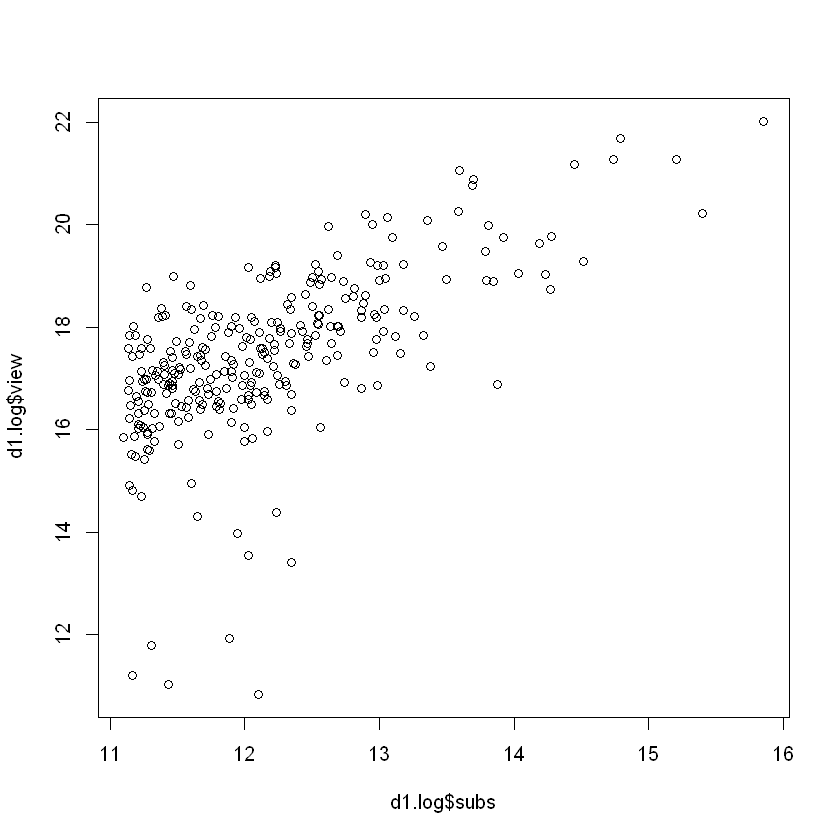

In [72]:
plot(d1.log$subs, d1.log$view )


It is sufficient to introduce the joint distribution, conditional distribution
and marginal distribution in the simple bivariate case, and these definitions
can be extended to multivariate distributions. Suppose
a bivariate random variable $(X,Y)$ has a joint density
$f(\cdot,\cdot)$.
The  *conditional density* can be roughly written as  $f\left(y|x\right)=f\left(x,y\right)/f\left(x\right)$ if we do not formally deal
with the case $f(x)=0$.
The *marginal density* $f\left(y\right)=\int f\left(x,y\right)dx$ integrates out
the coordinate that is not interested.

## Independence

In a probability space $(\Omega, \mathcal{F}, P)$, for two events $A_1,A_2\in \mathcal{F}$ the *conditional probability* is

$$P\left(A_1|A_2\right) = \frac{P\left(A_1 A_2\right)}{ P\left(A_2\right) }.$$ 

In the definition of conditional probability, $A_2$ plays
the role of the outcome space  so that
 $P(A_1 A_2)$ is standardized by the total mass $P(A_2)$.

Since $A_1$ and $A_2$ are symmetric, we also have $P(A_1 A_2) = P(A_2|A_1)P(A_1)$.
It implies
$$P(A_1 | A_2)=\frac{P\left(A_2| A_1\right)P\left(A_1\right)}{P\left(A_2\right)}$$
This formula is the well-known *Bayes' Theorem*. It is particularly important in
decision theory.



**Example:** $A_1$ is the event "a student can survive CUHK's MSc program", and $A_2$ is
his or her application profile.




We say two events $A_1$ and $A_2$ are *independent* if $P(A_1A_2) = P(A_1)P(A_2)$.
If $P(A_2) \neq 0$, it is equivalent to $P(A_1 | A_2 ) = P(A_1)$.
In words, knowing $A_2$ does not change the probability of $A_1$.

If $X$ and $Y$ are independent, $E[XY] = E[X]E[Y]$.


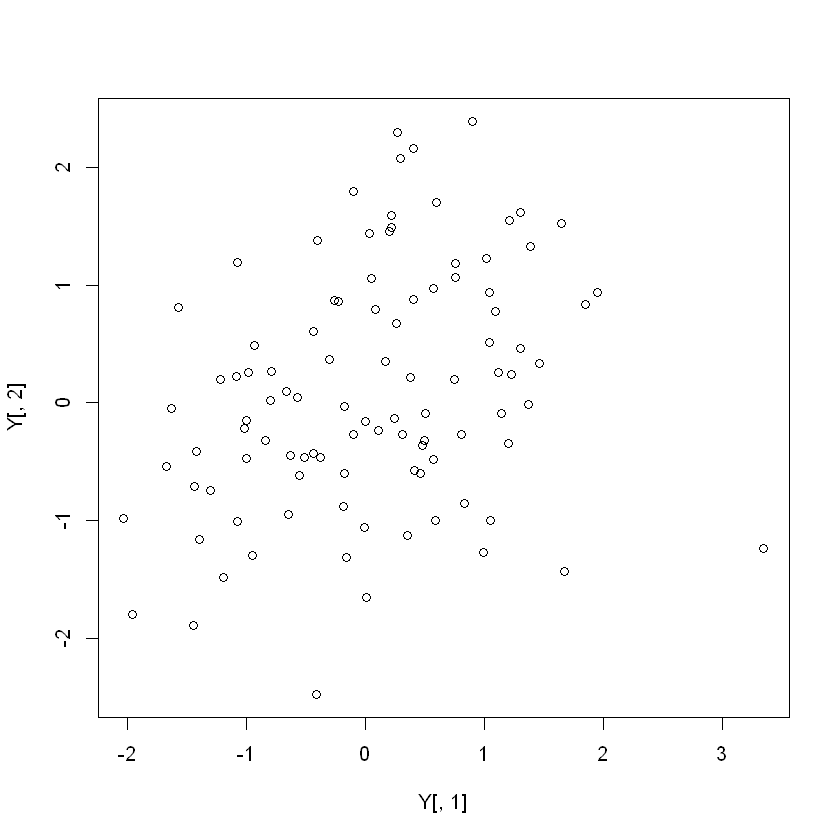

In [73]:
Y <- matrix( rnorm(200), ncol = 2)
plot(x = Y[,1], y = Y[,2])

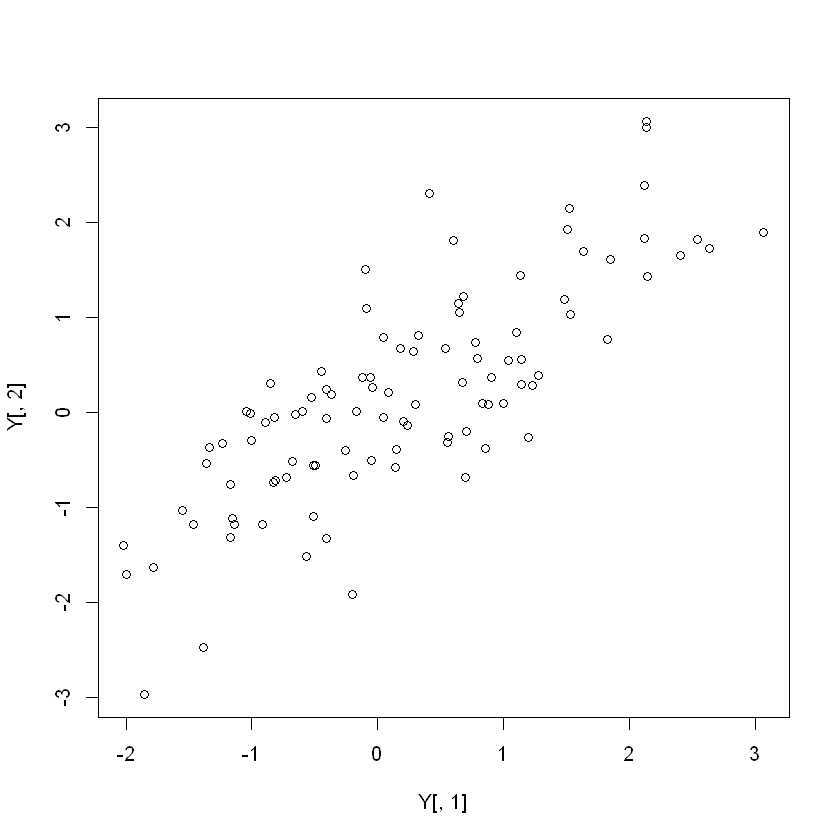

In [74]:
Y <- matrix( rnorm(200), ncol = 2) %*% matrix( c(1, 0.5, 0.5, 1), 2 )
plot(x = Y[,1], y = Y[,2])


**Application**: (Chebyshev law of large numbers) If
$X_{1},X_{2},\ldots,X_{n}$ are independent, and they have the same mean
$0$ and variance $\sigma^{2}<\infty$. Let
$Z_{n}=\frac{1}{n}\sum_{i=1}^{n} X_{i}$. Then the
probability $P\left(\left|Z_{n}\right|>\epsilon\right)\to0$ as
$n\to\infty$.

The culmination of probability theory is *law of large numbers* and
*central limit theorem*.

## Law of Iterated Expectations




In the bivariate case, if the conditional density exists, the conditional expectation can be computed as
    $E\left[Y|X\right]=\int yf\left(y|X\right)dy$.
The law of iterated expectation implies $E\left[E\left[Y|X\right]\right]=E\left[Y\right]$.


In [75]:
dx <- d1.log %>% 
  tibble::add_column(category = d0$category) %>%
  dplyr::group_by(category) %>%
  dplyr::summarize(mean = mean(count), no = dplyr::n() )
print(dx)

print( sum( dx$mean * ( dx$no/nrow(d1.log) ) ) ) # average over categories
print( mean(d1.log[["count"]])) # overall average

# A tibble: 15 x 3
   category               mean    no
   <chr>                 <dbl> <int>
 1 Autos & Vehicles       7.52     2
 2 Comedy                 5.74     8
 3 Education              6.29    10
 4 Entertainment          6.34    41
 5 Film & Animation       5.98    28
 6 Gaming                 6.43    28
 7 Howto & Style          5.71    31
 8 Music                  5.91    24
 9 News & Politics        8.13    22
10 Nonprofits & Activism  6.45     1
11 People & Blogs         5.72    68
12 Pets & Animals         6.19     1
13 Science & Technology   6.08     8
14 Sports                 6.14     5
15 Travel & Events        5.48    12
[1] 6.146389
[1] 6.146389




Below are some properties of conditional expectations

1.  $E\left[E\left[Y|X_{1},X_{2}\right]|X_{1}\right]=E\left[Y|X_{1}\right];$
2.  $E\left[E\left[Y|X_{1}\right]|X_{1},X_{2}\right]=E\left[Y|X_{1}\right];$
3.  $E\left[h\left(X\right)Y|X\right]=h\left(X\right)E\left[Y|X\right].$

**Application**: Regression is a technique that decomposes a random variable $Y$
into two parts, a conditional mean and a residual. Write
 $Y=E\left[Y|X\right]+\epsilon$, where
$\epsilon=Y-E\left[Y|X\right]$. Show that $E[\epsilon] = 0$ and  $E[\epsilon E[Y|X] ] = 0$.